In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from typing import Literal

In [3]:
#TODO
# PCA iris
# LDA iris
# TSNE 
# UMAP

### PCA


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

iris = datasets.load_iris()
x_iris = sc.fit_transform(iris.data)
y_iris = iris.target

print(x_iris.shape)

(150, 4)


In [18]:

# SVD

def plot_2d(type: Literal['umap', 'svd', 'pca', 'tsne', 'lda'], x, y=y_iris):
    plt.figure(figsize=(8, 6))
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel(f'{type.upper()} Component 1')
    plt.ylabel(f'{type.upper()} Component 2')
    plt.title(f'{type.upper()} - Iris Dataset')
    plt.show()
    

In [6]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(x_iris)

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


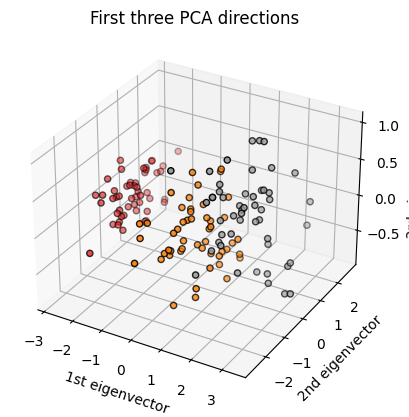

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_iris_pca = pca.transform(x_iris)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_iris_pca[:, 0], x_iris_pca[:, 1], x_iris_pca[:, 2], c=y_iris, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

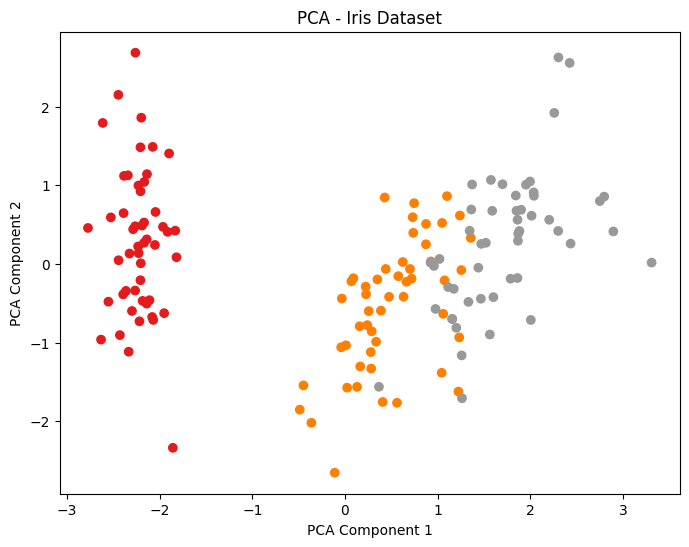

In [8]:
pca2d = PCA(n_components=2)
x_iris_pca2d = pca2d.fit_transform(x_iris)

plot_2d('pca', x_iris_pca2d)


### LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_iris_lda2d = lda.fit_transform(x_iris, y_iris)

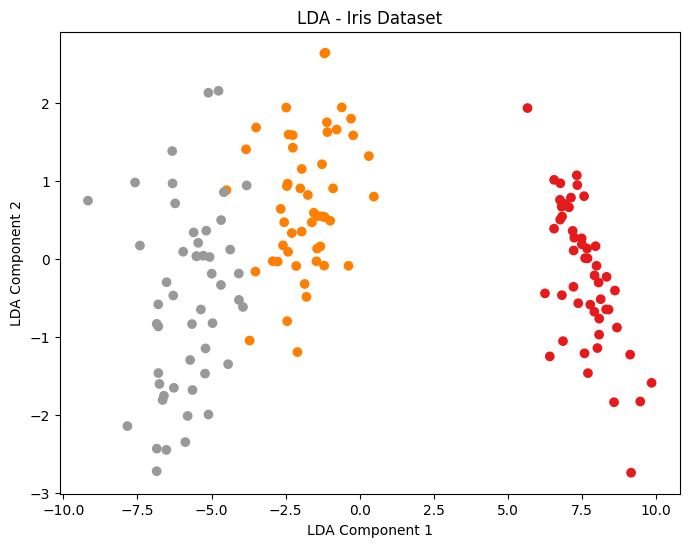

In [10]:
# Create a scatter plot of the reduced dataset
plot_2d('lda', x_iris_lda2d)


### TSNE


In [11]:
from sklearn.manifold import TSNE

tsne3d = TSNE(n_components=3)
tsne2d = TSNE(n_components=2, perplexity=30)

x_iris_tsne3d = tsne3d.fit_transform(x_iris)
x_iris_tsne2d = tsne2d.fit_transform(x_iris)

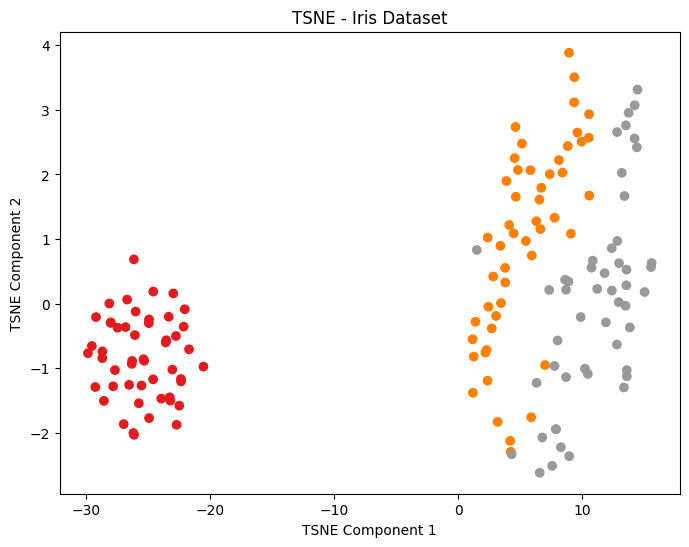

In [12]:

plot_2d('tsne', x_iris_tsne2d)

### UMAP


In [13]:
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=10, min_dist=0.1 )
x_iris_umap2d = umap.fit_transform(x_iris)

/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/divyan-18871/Developer/Learning/ml_/pyenv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/divyan-18871/Developer/Learning/ml_/py

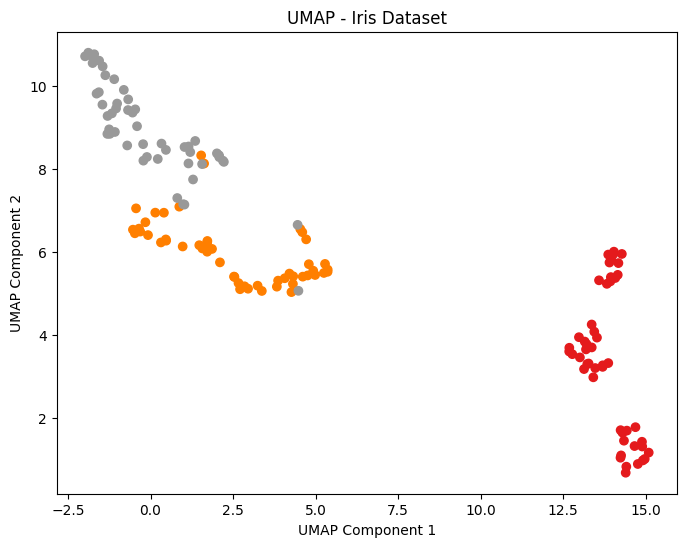

In [14]:
plot_2d('umap', x_iris_umap2d)

In [15]:
from sklearn.decomposition import TruncatedSVD

svd2d = TruncatedSVD(n_components=2)
x_iris_svd2d = svd2d.fit_transform(x_iris)

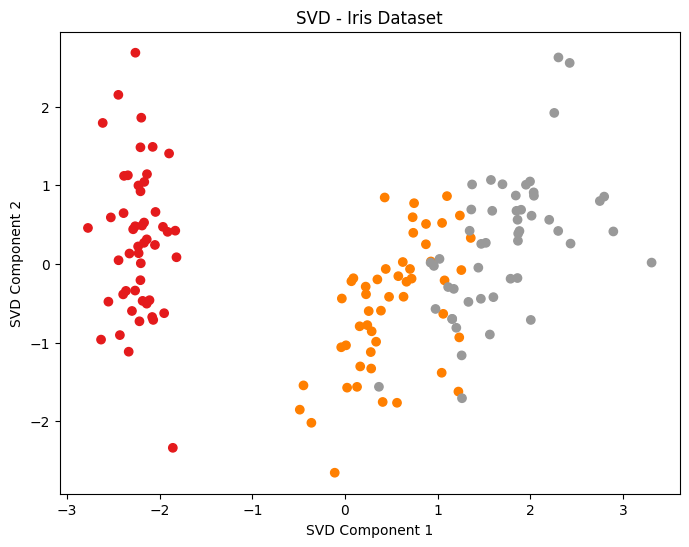

In [16]:
plot_2d('svd', x_iris_svd2d)

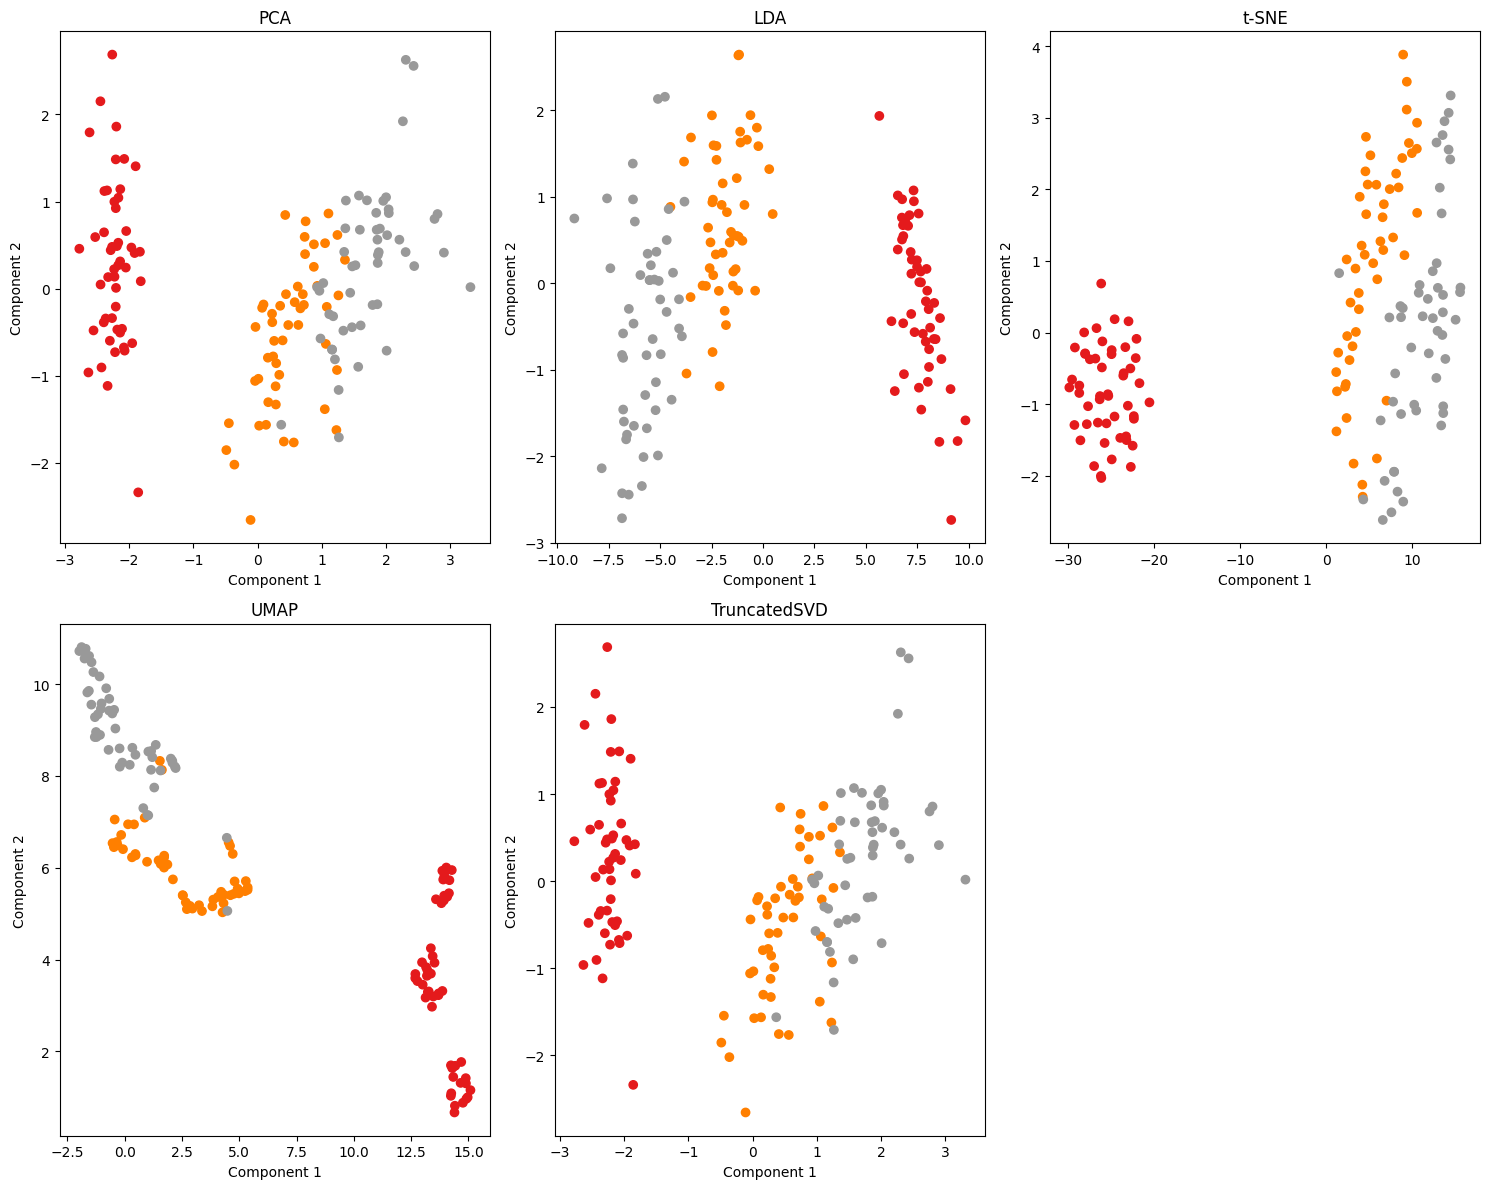

In [17]:

plt.figure(figsize=(15, 12))

# PCA
plt.subplot(2, 3, 1)
plt.scatter(x_iris_pca2d[:, 0], x_iris_pca2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# LDA
plt.subplot(2, 3, 2)
plt.scatter(x_iris_lda2d[:, 0], x_iris_lda2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("LDA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# t-SNE
plt.subplot(2, 3, 3)
plt.scatter(x_iris_tsne2d[:, 0], x_iris_tsne2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# UMAP
plt.subplot(2, 3, 4)
plt.scatter(x_iris_umap2d[:, 0], x_iris_umap2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("UMAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# SVD
plt.subplot(2, 3, 5)
plt.scatter(x_iris_svd2d[:, 0], x_iris_svd2d[:, 1], c=y_iris, cmap=plt.cm.Set1)
plt.title("TruncatedSVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.tight_layout()
plt.show()
